In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('kaggle_data/train.csv')
test_data = pd.read_csv('kaggle_data/test.csv')
sample = pd.read_csv('kaggle_data/sample_submission.csv')

num_bins = int(np.floor(1 + np.log2(len(train_data))))
print(num_bins)
train_data.loc[:,'bins'] = pd.cut(train_data['target'],bins=num_bins,labels=False)

bins = train_data.bins.to_numpy()
target = train_data.target.to_numpy()

def rmse_score(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

train_data.head()

12


,id,url_legal,license,excerpt,target,standard_error,bins
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,7
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,7
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,6
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,5
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,8


In [9]:
max(train_data['target']), min(train_data['target']), max(train_data['standard_error']), min(train_data['standard_error'])

(1.7113898269999999, -3.676267773, 0.649671297, 0.0)

In [10]:
len(max(train_data['excerpt'], key=len)), len(min(train_data['excerpt'], key=len))

(1341, 669)

In [3]:
from nltk.corpus import stopwords
stopwords.words('english')
sw = stopwords.words()[520:800]
print(sw)

['was', 'op', 'aan', 'met', 'als', 'voor', 'had', 'er', 'maar', 'om', 'hem', 'dan', 'zou', 'of', 'wat', 'mijn', 'men', 'dit', 'zo', 'door', 'over', 'ze', 'zich', 'bij', 'ook', 'tot', 'je', 'mij', 'uit', 'der', 'daar', 'haar', 'naar', 'heb', 'hoe', 'heeft', 'hebben', 'deze', 'u', 'want', 'nog', 'zal', 'me', 'zij', 'nu', 'ge', 'geen', 'omdat', 'iets', 'worden', 'toch', 'al', 'waren', 'veel', 'meer', 'doen', 'toen', 'moet', 'ben', 'zonder', 'kan', 'hun', 'dus', 'alles', 'onder', 'ja', 'eens', 'hier', 'wie', 'werd', 'altijd', 'doch', 'wordt', 'wezen', 'kunnen', 'ons', 'zelf', 'tegen', 'na', 'reeds', 'wil', 'kon', 'niets', 'uw', 'iemand', 'geweest', 'andere', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 't

In [7]:
from collections import Counter
freq = Counter(' '.join(train_data['excerpt']).lower().split())
tmp_f = dict(freq)
for f in tmp_f:
    if f in sw:del freq[f]
freq_dict = dict(sorted(freq.items(), key=lambda x:x[1], reverse=True)[0:10])
result = {
    '單字':freq_dict.keys(),
    '頻率':freq_dict.values()
}
pd.DataFrame(result) #應該統計文章中字的頻率與target的影響

,單字,頻率
0,one,1742
1,would,1119
2,little,1092
3,could,868
4,like,759
5,two,737
6,said,727
7,made,719
8,many,669
9,great,661


In [13]:
freq_list = []
for sent in train_data['excerpt']:
    s_list = sent.lower().split()
    for w in sent.lower().split():
        if w in sw:del s_list[s_list.index(w)]
    freq_list.append(list(dict(sorted(Counter(s_list).items(), key=lambda x:x[1], reverse=True)[:5]).keys()))



In [14]:
df = train_data.copy()

new_col = 'freq_word'
df.insert(4, new_col, pd.Series(freq_list))  # 調整欄位順序用
columns = df.columns.tolist()
#df[new_col] = df.excerpt.apply(lambda x: str(list(dict(sorted(Counter(x.lower().split()).items(), key=lambda x:x[1], reverse=True)[:10]).keys())).replace('[','').replace(']',''))
#df[new_col] = df.excerpt.apply(lambda x: str(list(dict(sorted(Counter(x.lower().split()).items(), key=lambda x:x[1], reverse=True)[:10]).keys())).replace('[','').replace(']',''))
df.sort_values('target', ascending=False).reset_index().loc[:, columns[3:-1]].to_csv("train_with_freq_word.csv")
df.sort_values('target', ascending=False).reset_index().loc[:, columns[3:-1]]

,excerpt,freq_word,target,standard_error
0,When you think of dinosaurs and where they liv...,"[dinosaurs, lived, dinosaur, think, near]",1.711390,0.646900
1,"For her last birthday, Sisanda had a special t...","[sisanda, special, –, party, giraffes]",1.597870,0.596349
2,"Every day, Emeka's father took him to school i...","[emeka, old, man, father, bag.]",1.583847,0.624776
3,More people came to the bus stop just before 9...,"[bus, town, get, people, stop]",1.541672,0.606997
4,Grandma's garden was wonderful. It was full of...,"[grandma, bananas., leaves, grandma's, house.]",1.467665,0.599600
...,...,...,...,...
2829,"The tree is dioecious, bearing male catkins on...","[tree, female, feet, male, near]",-3.636834,0.606822
2830,As to surface-slope its measurement—from nearl...,"[velocity, would, surface, average, vertical]",-3.639936,0.603819
2831,"The iron cylinder weighs 23 kilogrammes; but, ...","[machines, per, kilogrammes;, three, absolute]",-3.642892,0.644398
2832,The Dunwich horror itself came between Lammas ...,"[armitage, scream, dr., efforts, anxious]",-3.668360,0.571404


In [11]:
from functools import reduce
print(train_data.columns.tolist())
#train_data.loc[:,'freq_word'] = 
for data in train_data['excerpt']:
    freq = Counter(data.lower().split())
    freq_dict = dict(sorted(freq.items(), key=lambda x:x[1], reverse=True)[:3])
    print(freq_dict)



['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error', 'bins']
{'the': 19, 'and': 9, 'was': 6}
{'you': 8, 'to': 7, 'the': 6}
{'and': 9, 'the': 7, 'on': 4}
{'and': 15, 'the': 13, 'on': 4}
{'a': 18, 'and': 10, 'the': 10}
{'and': 9, 'to': 6, 'of': 6}
{'the': 16, 'in': 9, 'they': 8}
{'the': 22, 'of': 13, 'to': 7}
{'the': 11, 'in': 6, 'and': 5}
{'a': 10, 'the': 10, 'he': 9}
{'the': 17, 'of': 10, 'to': 8}
{'his': 7, 'of': 6, 'and': 6}
{'the': 14, 'and': 11, 'in': 9}
{'the': 15, 'he': 11, 'a': 8}
{'the': 13, 'a': 9, 'and': 7}
{'he': 9, 'to': 7, 'the': 7}
{'and': 10, 'she': 10, 'the': 8}
{'the': 15, 'and': 14, 'they': 9}
{'the': 12, 'that': 7, 'of': 6}
{'the': 8, 'and': 8, 'his': 7}
{'and': 13, 'he': 10, 'the': 9}
{'the': 22, 'and': 7, 'it': 6}
{'the': 19, 'and': 12, 'in': 8}
{'the': 7, 'and': 6, 'he': 6}
{'the': 11, 'of': 8, 'and': 7}
{'to': 7, 'he': 5, 'the': 5}
{'the': 9, 'i': 5, 'and': 4}
{'the': 18, 'to': 9, 'and': 7}
{'the': 10, 'her': 10, 'and': 8}
{'he': 10, 'his': 7, 't

{'the': 16, 'and': 7, 'of': 7}
{'the': 16, 'of': 13, 'to': 9}
{'the': 17, 'of': 7, 'and': 7}
{'the': 15, 'to': 11, 'of': 10}
{'i': 8, 'she': 6, 'the': 6}
{'the': 15, 'of': 13, 'is': 7}
{'the': 24, 'of': 11, 'a': 7}
{'the': 13, 'of': 7, 'in': 6}
{'the': 14, 'to': 8, 'of': 8}
{'the': 11, 'of': 6, 'my': 5}
{'the': 14, 'and': 13, 'a': 5}
{'the': 13, 'i': 6, 'in': 5}
{'the': 22, 'and': 8, 'he': 5}
{'the': 25, 'of': 11, 'and': 11}
{'the': 17, 'of': 7, 'to': 6}
{'and': 9, 'his': 8, 'he': 7}
{'the': 10, 'of': 10, 'to': 7}
{'the': 14, 'de': 8, 'was': 7}
{'of': 10, 'the': 10, 'and': 7}
{'the': 9, 'i': 7, 'that': 4}
{'is': 10, 'the': 10, 'of': 8}
{'the': 8, 'it': 6, 'to': 6}
{'the': 13, 'to': 9, 'he': 6}
{'the': 15, 'of': 7, 'they': 6}
{'the': 18, 'and': 10, 'to': 7}
{'the': 11, 'they': 9, 'to': 8}
{'the': 11, 'and': 9, 'to': 8}
{'and': 15, 'the': 14, 'a': 6}
{'the': 13, 'a': 9, 'and': 6}
{'the': 14, 'and': 11, 'she': 7}
{'the': 12, 'a': 8, 'and': 7}
{'the': 22, 'and': 7, 'of': 5}
{'the': 22, 'an

{'a': 8, 'of': 8, 'to': 7}
{'the': 8, 'a': 6, 'of': 6}
{'and': 13, 'the': 8, 'he': 6}
{'the': 8, 'she': 7, 'of': 6}
{'the': 14, 'of': 9, 'in': 7}
{'the': 16, 'she': 8, 'to': 7}
{'the': 16, 'with': 5, 'to': 5}
{'the': 10, 'that': 5, 'to': 4}
{'to': 6, 'the': 5, 'for': 5}
{'the': 12, 'and': 9, 'of': 7}
{'the': 18, 'her': 9, 'she': 9}
{'the': 11, 'of': 7, 'was': 7}
{'the': 17, 'and': 6, 'were': 5}
{'the': 21, 'of': 9, 'and': 4}
{'the': 13, 'to': 7, 'had': 7}
{'the': 13, 'her': 10, 'and': 6}
{'the': 17, 'and': 5, 'of': 5}
{'to': 8, 'she': 6, 'he': 6}
{'the': 13, 'and': 7, 'as': 5}
{'the': 10, 'and': 8, 'she': 8}
{'the': 7, 'his': 7, 'he': 6}
{'he': 10, 'of': 7, 'had': 7}
{'the': 13, 'of': 6, 'and': 4}
{'the': 12, 'he': 10, 'to': 8}
{'and': 17, 'the': 14, 'to': 6}
{'and': 9, 'books': 9, 'with': 8}
{'and': 10, 'the': 9, 'they': 4}
{'a': 12, 'and': 12, 'the': 10}
{'the': 15, 'and': 12, 'of': 10}
{'the': 11, 'and': 8, 'of': 7}
{'the': 8, 'and': 7, 'that': 6}
{'the': 8, 'to': 7, 'and': 6}
{'the

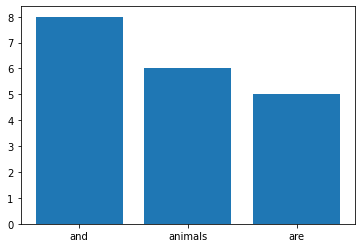

In [12]:
plt.bar(range(len(freq_dict)), list(freq_dict.values()), align='center')
plt.xticks(range(len(freq_dict)), list(freq_dict.keys()))
plt.show()